# Transfer Learning Basics

In [24]:
%%html
<h3 style="color:#049">Transferring</h3>

In [22]:
%%html
%%latex
<h4 style="color:#089">Whether Feature Space $\mathbb{X}$ and $\mathbb{Y}$ of two Domains are same!</h4>

In [26]:
%%html
%%latex
<h4 style="color:#089">Whether Marginal Distributions $P(X)$ and $P(Y)$ of elements in Feature Space $X \in \mathbb{X}$ and $Y \in \mathbb{Y}$ are same!</h4>


In [32]:
%%latex
$X = \{x_1, x_2, \ldots, x_n\}$ and $Y = \{y_1, y_2, \ldots, y_m\}$.

We consider n=m (say)!

<IPython.core.display.Latex object>

In [35]:
%%latex
For $i^{th}$ element, name($x_i$) = name($y_i$) = 'bacteria_name' we will check the marginal distributions $P(x_i)$ and $P(y_i)$.

<IPython.core.display.Latex object>

In [100]:
%%html
<h5 style="color:#109">Overall Bacterial Distribution</h5>

In [103]:
%%html
<h7 style="color:#909">Mimic Bacterial Distribution</h7>

In [44]:
import pandas as pd
mimic=pd.read_csv('zevac_data.csv', sep='\t', usecols = ['patient_id', 'admission_id', 'age', 'sex', 'sc_date',
       'sample_type', 'bacteria_name', 'antibiotic_name', 'num_prev_adm',
       'interval', 'device', 'hai', 'susceptibility', 'comorbidity'])

In [52]:
bacteria = mimic.bacteria_name.unique()

In [58]:
mimicIsolateCounts = pd.DataFrame(columns=['bacteria_name', 'isolates', 'percentage'])

In [55]:
def count(bacteria):
    filtered = mimic[mimic.bacteria_name==bacteria][['patient_id', 'admission_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered

In [60]:
mimicIsolateCounts.bacteria_name = pd.Series(bacteria)
mimicIsolateCounts.isolates = mimicIsolateCounts.bacteria_name.apply(lambda x: count(x))
mimicIsolateCounts.percentage = mimicIsolateCounts.isolates.apply(lambda x: 100*(x/sum(mimicIsolateCounts.isolates)))

In [64]:
mimicIsolateCounts = mimicIsolateCounts.sort_values(by=['percentage'], ascending=False)
mimicIsolateCounts

,bacteria_name,isolates,percentage
0,Staphylococcus aureus,7469,27.037104
8,Escherichia coli,3562,12.894118
6,Enterococcus,3485,12.615385
5,Pseudomonas aeruginosa,2877,10.414480
1,Staphylococcus,2368,8.571946
2,Klebsiella pneumoniae,2030,7.348416
9,Enterobacter cloacae,816,2.953846
13,Proteus mirabilis,654,2.367421
3,Stenotrophomonas maltophilia,513,1.857014
23,Serratia marcescens,504,1.824434


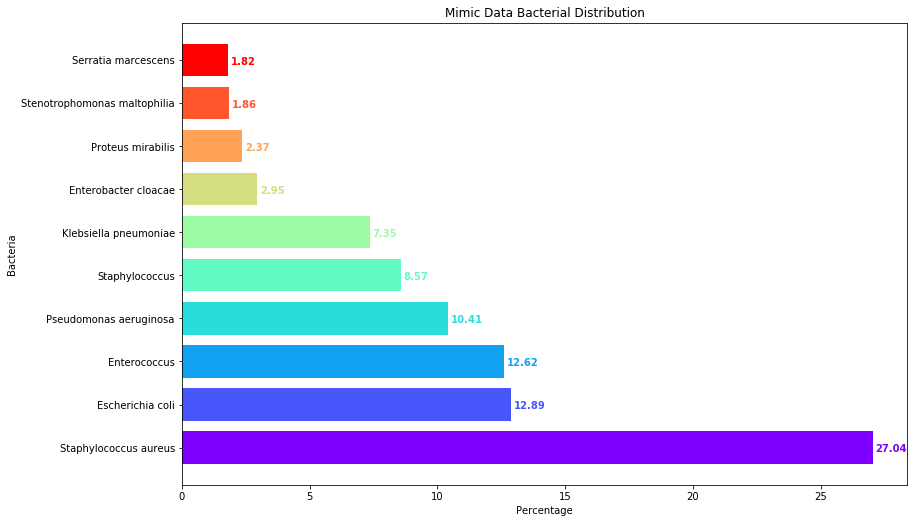

In [99]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
x = mimicIsolateCounts[0:10].bacteria_name
y = mimicIsolateCounts[0:10].percentage
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('Mimic Data Bacterial Distribution')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')      
plt.show()

In [102]:
%%html
<h7 style="color:#909">AIIMS Bacterial Distribution</h7>

In [104]:
aiims=pd.read_csv('/Users/deba_mycol/Zevac_Unified/zevac_unified/pp.csv', usecols=['slno', 'hosp_admission_id', 'hosp_patient_id', 
       'age','sex', 'department', 'sample_type', 'ward_name', 'caretype',
       'num_prev_adm', 'sc_date', 'interval', 'catheter', 'cancer',
       'cerebrovascular_disease', 'dementia_or_alzheimers', 'diabetes',
       'heart_disease', 'hiv_or_aids', 'hypertension', 'liver_disease',
       'pulmonary_disease_asthma', 'renal_disease',
       'rheumatic_or_connective_tissue_disease', 'no_comorbidity',
       'bacteria_name', 'antibiotic_name', 'gram', 'susceptibility'])

bacteria1 = aiims.bacteria_name.unique()
aiimsIsolateCounts = pd.DataFrame(columns=['bacteria_name', 'isolates', 'percentage'])
def count1(bacteria):
    filtered = aiims[aiims.bacteria_name==bacteria][['slno', 'hosp_admission_id', 'hosp_patient_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered
aiimsIsolateCounts.bacteria_name = pd.Series(bacteria1)
aiimsIsolateCounts.isolates = aiimsIsolateCounts.bacteria_name.apply(lambda x: count1(x))
aiimsIsolateCounts.percentage = aiimsIsolateCounts.isolates.apply(lambda x: 100*(x/sum(aiimsIsolateCounts.isolates)))
aiimsIsolateCounts = aiimsIsolateCounts.sort_values(by=['percentage'], ascending=False)
aiimsIsolateCounts


,bacteria_name,isolates,percentage
1,Escherichia coli,8904,27.802411
0,Klebsiella pneumoniae,4951,15.459314
5,Acinetobacter,4100,12.802098
6,Pseudomonas aeruginosa,3087,9.639043
8,Staphylococcus aureus,2210,6.900643
4,Pseudomonas,2080,6.494723
9,"Staphylococcus, coagulase negative",1303,4.068569
10,Enterobacter,1058,3.303566
3,Enterococcus faecium,690,2.154499
11,Klebsiella oxytoca,497,1.551864


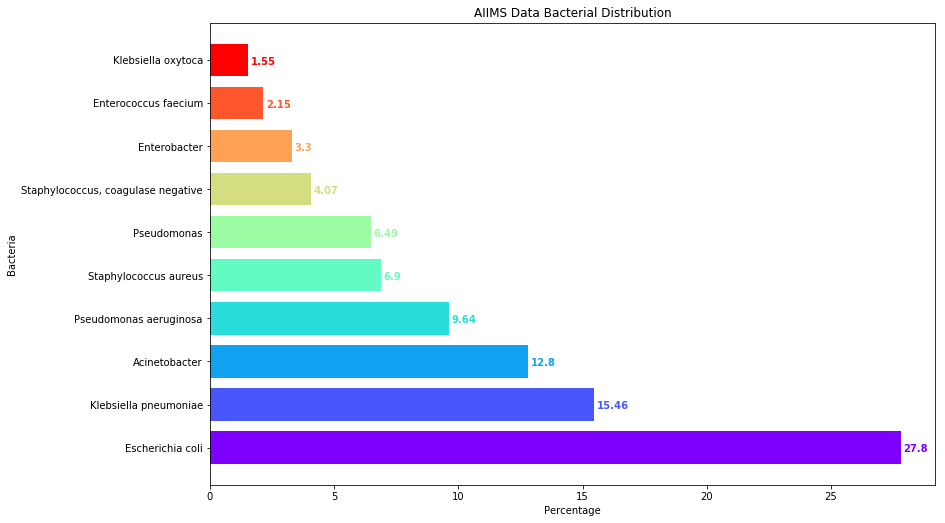

In [105]:
x = aiimsIsolateCounts[0:10].bacteria_name
y = aiimsIsolateCounts[0:10].percentage
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('AIIMS Data Bacterial Distribution')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')      
plt.show()

In [108]:
%%html
<h7 style="color:#909">AIIMS ICU Bacterial Distribution</h7>

In [106]:
aiimsICU = aiims[aiims.caretype=='ICU']

bacteria2 = aiimsICU.bacteria_name.unique()
aiimsIsolateCounts = pd.DataFrame(columns=['bacteria_name', 'isolates', 'percentage'])
def count2(bacteria):
    filtered = aiimsICU[aiimsICU.bacteria_name==bacteria][['slno', 'hosp_admission_id', 'hosp_patient_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered
aiimsIsolateCounts.bacteria_name = pd.Series(bacteria2)
aiimsIsolateCounts.isolates = aiimsIsolateCounts.bacteria_name.apply(lambda x: count2(x))
aiimsIsolateCounts.percentage = aiimsIsolateCounts.isolates.apply(lambda x: 100*(x/sum(aiimsIsolateCounts.isolates)))
aiimsIsolateCounts = aiimsIsolateCounts.sort_values(by=['percentage'], ascending=False)
aiimsIsolateCounts

,bacteria_name,isolates,percentage
7,Acinetobacter,2219,28.285532
0,Klebsiella pneumoniae,1516,19.324410
5,Escherichia coli,1081,13.779477
2,Pseudomonas aeruginosa,798,10.172084
4,Pseudomonas,622,7.928617
3,Enterobacter,297,3.785851
15,Acinetobacter baumannii,219,2.791587
8,Enterococcus faecium,218,2.778840
12,"Staphylococcus, coagulase negative",172,2.192479
13,Staphylococcus aureus,137,1.746335


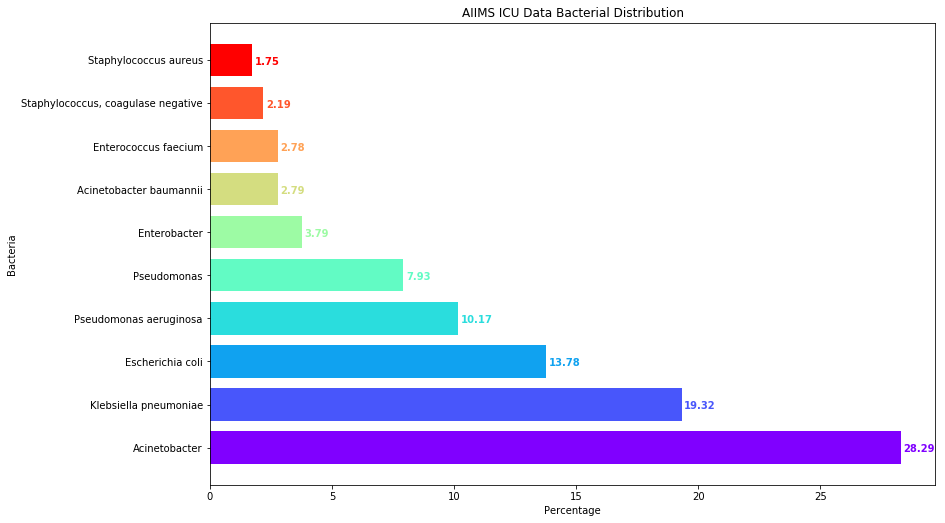

In [107]:
x = aiimsIsolateCounts[0:10].bacteria_name
y = aiimsIsolateCounts[0:10].percentage
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('AIIMS ICU Data Bacterial Distribution')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')      
plt.show()

In [109]:
%%latex
For $i^{th}$ element, name($x_i$) = name($y_i$) = 'age' we will check the marginal distributions $P(x_i)$ and $P(y_i)$ given the 'caretype' in AIIMS is 'ICU' since MIMIC comprises of ICU data only.


<IPython.core.display.Latex object>

In [110]:
%%html
<h5 style="color:#109">Overall Age Distribution</h5>

In [111]:
%%html
<h7 style="color:#909">Mimic Age Distribution</h7>

<Figure size 432x288 with 0 Axes>

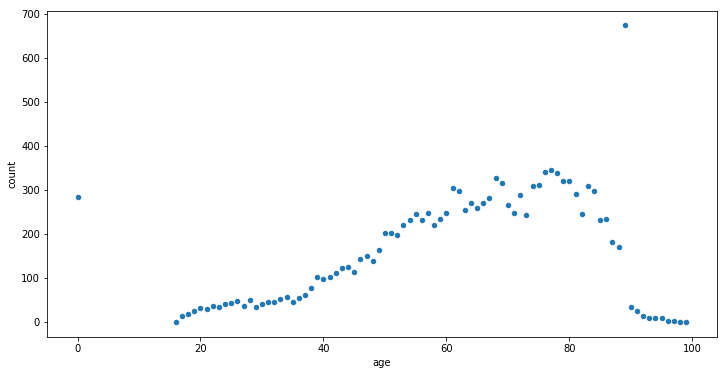

In [135]:
plt.figure()
ageMIMIC = mimic[['patient_id', 'admission_id', 'age']].drop_duplicates().age.value_counts()
ageDistribution = pd.DataFrame(columns=['age', 'count'])
ageDistribution['age'] = ageMIMIC.index
ageDistribution['count'] = ageMIMIC.values
ageDistribution.plot(x='age', y='count', kind='scatter', figsize=(12,6))

In [136]:
%%html
<h7 style="color:#909">AIIMS ICU Age Distribution</h7>

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<Figure size 432x288 with 0 Axes>

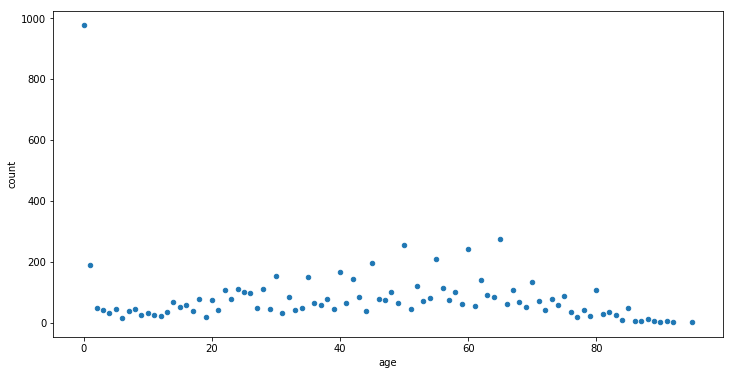

In [140]:
plt.figure()
aiimsICU.age = aiimsICU.age.apply(lambda x: round(x))
ageICUAIIMS = aiimsICU[['slno', 'hosp_patient_id', 'hosp_admission_id', 'age']].drop_duplicates().age.value_counts()
ageDistribution1 = pd.DataFrame(columns=['age', 'count'])
ageDistribution1['age'] = ageICUAIIMS.index
ageDistribution1['count'] = ageICUAIIMS.values
ageDistribution1.plot(x='age', y='count', kind='scatter', figsize=(12,6))

In [142]:
%%html
<h7 style="color:#909">AIIMS Age Distribution</h7>

<Figure size 432x288 with 0 Axes>

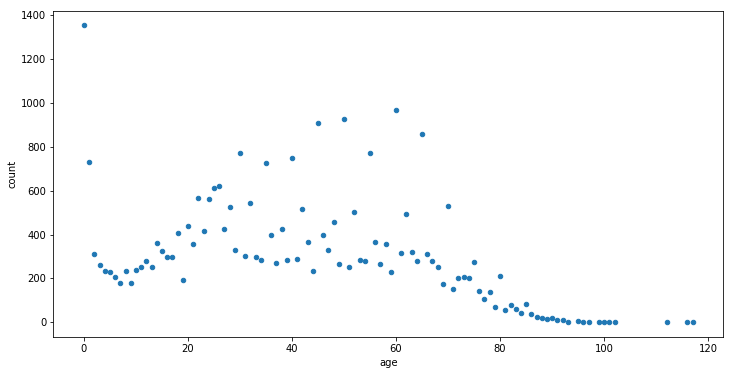

In [143]:
plt.figure()
aiims.age = aiims.age.apply(lambda x: round(x))
ageAIIMS = aiims[['slno', 'hosp_patient_id', 'hosp_admission_id', 'age']].drop_duplicates().age.value_counts()
ageDistribution2 = pd.DataFrame(columns=['age', 'count'])
ageDistribution2['age'] = ageAIIMS.index
ageDistribution2['count'] = ageAIIMS.values
ageDistribution2.plot(x='age', y='count', kind='scatter', figsize=(12,6))

In [144]:
%%html
<h5 style="color:#109">Overall Gender Distribution</h5>

In [145]:
%%html
<h7 style="color:#909">Mimic Gender Distribution</h7>

<Figure size 432x288 with 0 Axes>

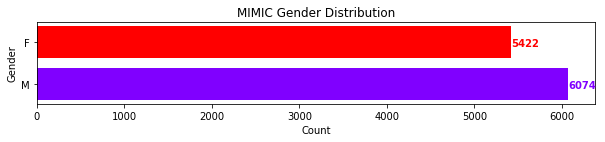

In [159]:
plt.figure()
genderMIMIC = mimic[['patient_id', 'sex']].drop_duplicates().sex.value_counts()
genderDistribution = pd.DataFrame(columns=['sex', 'count'])
genderDistribution['sex'] = genderMIMIC.index
genderDistribution['patientCount'] = genderMIMIC.values
x = genderDistribution.sex
y = genderDistribution.patientCount
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(10, 1.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(v), color=colors[i], fontweight='bold')
plt.title('MIMIC Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')      
plt.show()

In [160]:
%%html
<h7 style="color:#909">AIIMS ICU Gender Distribution</h7>

<Figure size 432x288 with 0 Axes>

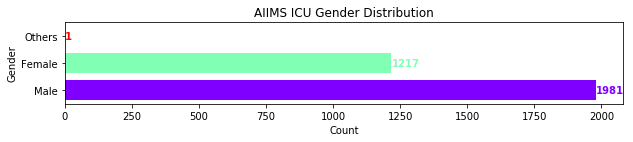

In [163]:
plt.figure()
genderICUAIIMS = aiimsICU[['hosp_patient_id', 'sex']].drop_duplicates().sex.value_counts()
genderDistribution = pd.DataFrame(columns=['sex', 'count'])
genderDistribution['sex'] = genderICUAIIMS.index
genderDistribution['patientCount'] = genderICUAIIMS.values
x = genderDistribution.sex
y = genderDistribution.patientCount
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(10, 1.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(v), color=colors[i], fontweight='bold')
plt.title('AIIMS ICU Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')      
plt.show()

In [161]:
%%html
<h7 style="color:#909">AIIMS Gender Distribution</h7>

<Figure size 432x288 with 0 Axes>

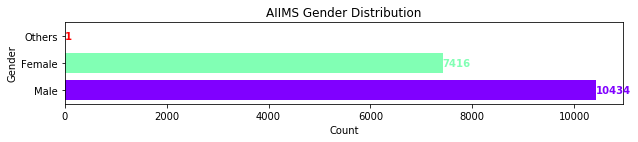

In [162]:
plt.figure()
genderAIIMS = aiims[['hosp_patient_id', 'sex']].drop_duplicates().sex.value_counts()
genderDistribution = pd.DataFrame(columns=['sex', 'count'])
genderDistribution['sex'] = genderAIIMS.index
genderDistribution['patientCount'] = genderAIIMS.values
x = genderDistribution.sex
y = genderDistribution.patientCount
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(10, 1.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(v), color=colors[i], fontweight='bold')
plt.title('AIIMS Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')      
plt.show()

In [164]:
%%html
<h5 style="color:#109">Urine Sample Bacterial Distribution</h5>

In [165]:
%%html
<h7 style="color:#909">Mimic Urine Sample Bacterial Distribution</h7>

In [173]:
urine = mimic[mimic.sample_type=='Urine']
bacteriaUrine = urine.bacteria_name.unique()
mimicIsolateCounts = pd.DataFrame(columns=['bacteria_name', 'isolates', 'percentage'])
def countUrine(bacteria):
    filtered = urine[urine.bacteria_name==bacteria][['admission_id', 'patient_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered
mimicIsolateCounts.bacteria_name = pd.Series(bacteriaUrine)
mimicIsolateCounts.isolates = mimicIsolateCounts.bacteria_name.apply(lambda x: countUrine(x))
mimicIsolateCounts.percentage = mimicIsolateCounts.isolates.apply(lambda x: 100*(x/sum(mimicIsolateCounts.isolates)))
mimicIsolateCounts = mimicIsolateCounts.sort_values(by=['percentage'], ascending=False)
mimicIsolateCounts


,bacteria_name,isolates,percentage
4,Escherichia coli,2263,31.452397
2,Enterococcus,1705,23.697012
3,Klebsiella pneumoniae,866,12.036136
1,Pseudomonas aeruginosa,612,8.505907
6,Proteus mirabilis,417,5.795691
5,Staphylococcus aureus,299,4.155664
0,Staphylococcus,275,3.822099
9,Enterobacter cloacae,179,2.487839
7,Klebsiella oxytoca,115,1.598332
8,Citrobacter freundii,84,1.167477


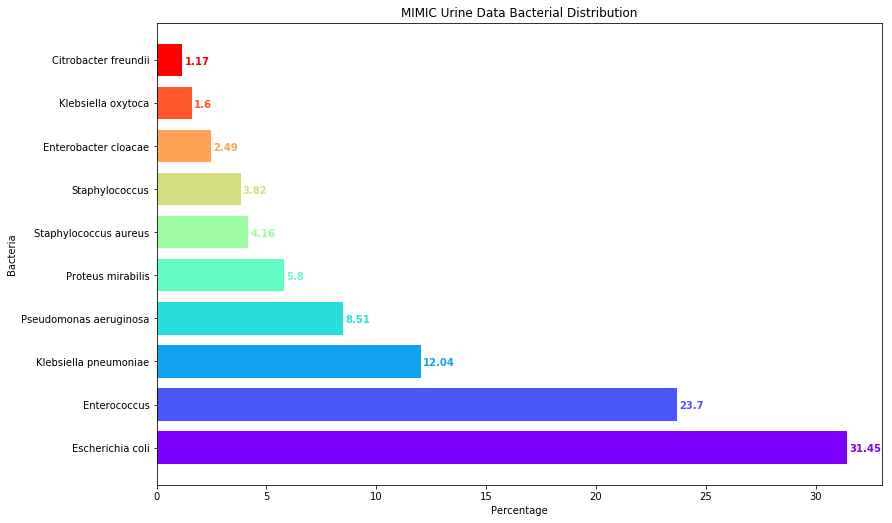

In [174]:
x = mimicIsolateCounts[0:10].bacteria_name
y = mimicIsolateCounts[0:10].percentage
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('MIMIC Urine Data Bacterial Distribution')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')      
plt.show()

In [172]:
%%html
<h7 style="color:#909">AIIMS Urine Sample Bacterial Distribution</h7>

In [175]:
urine = aiims[aiims.sample_type=='Urine']
bacteriaUrine = urine.bacteria_name.unique()
aiimsIsolateCounts = pd.DataFrame(columns=['bacteria_name', 'isolates', 'percentage'])
def countUrine1(bacteria):
    filtered = urine[urine.bacteria_name==bacteria][['slno', 'hosp_admission_id', 'hosp_patient_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered
aiimsIsolateCounts.bacteria_name = pd.Series(bacteriaUrine)
aiimsIsolateCounts.isolates = aiimsIsolateCounts.bacteria_name.apply(lambda x: countUrine1(x))
aiimsIsolateCounts.percentage = aiimsIsolateCounts.isolates.apply(lambda x: 100*(x/sum(aiimsIsolateCounts.isolates)))
aiimsIsolateCounts = aiimsIsolateCounts.sort_values(by=['percentage'], ascending=False)
aiimsIsolateCounts

,bacteria_name,isolates,percentage
3,Escherichia coli,5255,51.258291
4,Klebsiella pneumoniae,1714,16.718689
2,Pseudomonas aeruginosa,633,6.174405
0,Pseudomonas,536,5.228248
6,Enterobacter,336,3.277409
16,Enterococcus,283,2.760437
8,Klebsiella oxytoca,270,2.633632
9,Enterococcus faecium,230,2.243465
7,Staphylococcus aureus,182,1.775263
1,Acinetobacter,176,1.716738


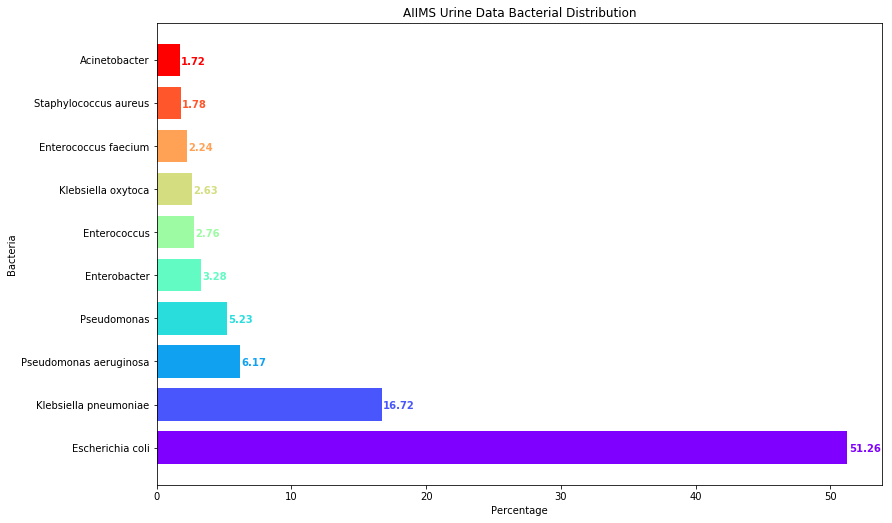

In [176]:
x = aiimsIsolateCounts[0:10].bacteria_name
y = aiimsIsolateCounts[0:10].percentage
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('AIIMS Urine Data Bacterial Distribution')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')      
plt.show()

In [177]:
urine = aiimsICU[aiimsICU.sample_type=='Urine']
bacteriaUrine = urine.bacteria_name.unique()
aiimsICUIsolateCounts = pd.DataFrame(columns=['bacteria_name', 'isolates', 'percentage'])
def countUrine2(bacteria):
    filtered = urine[urine.bacteria_name==bacteria][['slno', 'hosp_admission_id', 'hosp_patient_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered
aiimsICUIsolateCounts.bacteria_name = pd.Series(bacteriaUrine)
aiimsICUIsolateCounts.isolates = aiimsICUIsolateCounts.bacteria_name.apply(lambda x: countUrine2(x))
aiimsICUIsolateCounts.percentage = aiimsICUIsolateCounts.isolates.apply(lambda x: 100*(x/sum(aiimsICUIsolateCounts.isolates)))
aiimsICUIsolateCounts = aiimsICUIsolateCounts.sort_values(by=['percentage'], ascending=False)
aiimsICUIsolateCounts

,bacteria_name,isolates,percentage
3,Escherichia coli,199,26.184211
4,Klebsiella pneumoniae,185,24.342105
10,Enterobacter,73,9.605263
0,Enterococcus faecium,72,9.473684
1,Pseudomonas aeruginosa,66,8.684211
5,Pseudomonas,64,8.421053
2,Acinetobacter,28,3.684211
9,Enterococcus,15,1.973684
11,Enterococcus faecalis,11,1.447368
8,Proteus mirabilis,9,1.184211


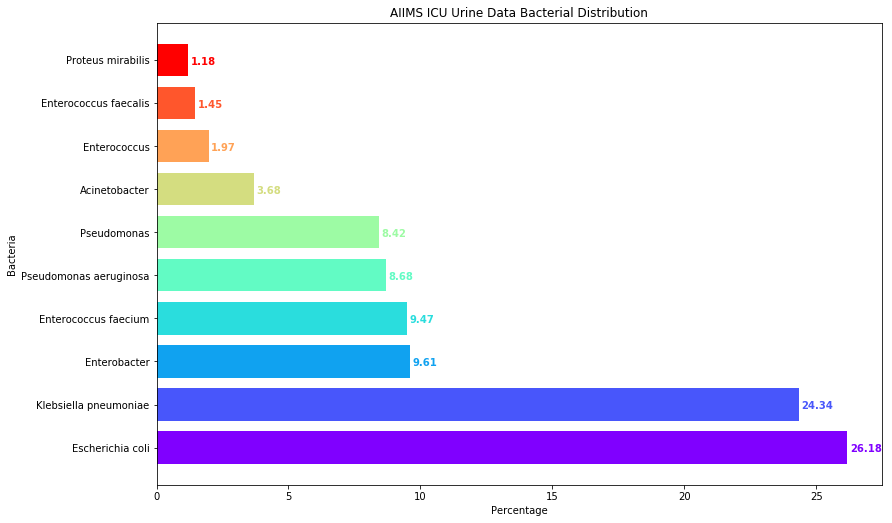

In [179]:
x = aiimsICUIsolateCounts[0:10].bacteria_name
y = aiimsICUIsolateCounts[0:10].percentage
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('AIIMS ICU Urine Data Bacterial Distribution')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')      
plt.show()

In [180]:
%%html
%%latex
<h4 style="color:#089">Whether Feature Space $y_1$ and $y_2$ are same for source and target domains!</h4>


In [182]:
%%html
As determined, the target labels are same for both source and target tasks: 'R'-Resistant and 'S'-Sensitive

In [183]:
%%html
%%latex
<h4 style="color:#089">Whether Conditional Distributions for predictions $P(y|X)$ and $P(y|Y)$ are same for source and target domains with marginal distributions X and Y!</h4>


In [184]:
%%latex
For $i^{th}$ element, name($x_i$) = name($y_i$) = 'antibiotic_name' we will check the conditional distributions $P(y|x_i)$ and $P(y|y_i)$.


<IPython.core.display.Latex object>

In [185]:
%%html
<h5 style="color:#109">Conditional for Drugs in Overall Distribution</h5>

In [186]:
%%html
<h7 style="color:#909">Mimic Conditional Distribution</h7>